# Exercise 10

Compare the 100 most frequent words in contemporary spoken English and the prosaic English of Shakespeare in two bar plots.

In [20]:
import os
import matplotlib.pyplot as plt

In [21]:
def traverse_directory(path):
    return [os.path.join(path, f) for f in os.listdir(path)
if os.path.isfile(os.path.join(path, f))]

In [22]:
files_shakespeare = traverse_directory(os.path.join("", "..", "exercise-5", "corpus"))
print((files_shakespeare[0]))
files_tv = traverse_directory(os.path.join("", "..", "exercise-10", "corpus"))
print((files_tv[0]))

../exercise-5/corpus/alls-well-that-ends-well_TXT_FolgerShakespeare.txt
../exercise-10/corpus/tv_text.txt


In [23]:
def tokenize_file(path):
  tokens = ""
  with open(path, 'r') as f:
    tokens = f.read()
    
  tokens_as_list = tokens.lower().split()
  normalized_tokens = []
  
  for token in tokens_as_list:
    normalized_token = ''.join(char for char in token if char.isalnum())
    if normalized_token != "":
      normalized_tokens.append(normalized_token)
  
  return normalized_tokens

In [24]:
def compute_counts(pathlist):
  counts = {}
  for path in pathlist:
    tokens = tokenize_file(path)
   
    for token in tokens:
      if token in counts:
        counts[token] = counts[token] + 1
      else:
        counts[token] = 1
  return counts

In [25]:
counts_shakespeare = compute_counts(files_shakespeare)
counts_tv = compute_counts(files_tv)

In [26]:
def sort_counts(counts):
  sorted_tuples = sorted(counts.items(), key=lambda item: item[1], reverse=True)
  return sorted_tuples

In [27]:
sorted_counts_shakespeare = sort_counts(counts_shakespeare)
print(sorted_counts_shakespeare[0])
sorted_counts_tv = sort_counts(counts_tv)
print(sorted_counts_tv[0])

('the', 29311)
('you', 80257)


In [28]:
def write_frequencies(frequencies, path):
  rank = 1
  sum_all_counts = 0
  for entry in frequencies:
    sum_all_counts = sum_all_counts + entry[1]

  with open(path, 'w') as f:
    for entry in frequencies:
      frequency = entry[1]/sum_all_counts
      f.write(str(rank) + "," + entry[0] + "," + str(entry[1]) + "," + str(frequency) + "\n")

      rank = rank + 1

  return

In [29]:
write_frequencies(sorted_counts_shakespeare, 'frequencies.csv')

In [30]:
def print_top5(frequencies):
    rank = 1
    sum_all_counts = 0
    for entry in frequencies:
        sum_all_counts = sum_all_counts + entry[1]

    print("Rank\t" + "Word\t" + "Count\t" + "Frequency\n")
    for entry in frequencies:
        frequency = entry[1]/sum_all_counts
        print(str(rank) + "\t" + entry[0] + "\t" + str(entry[1]) + "\t" + str(frequency) + "\n")
        rank = rank + 1
        if rank ==  6:
            break

    return

print_top5(sorted_counts_shakespeare)
print_top5(sorted_counts_tv)

Rank	Word	Count	Frequency

1	the	29311	0.030497283326847723

2	and	28303	0.02944848725733585

3	to	21931	0.02281859781792151

4	i	21599	0.02247316101724895

5	of	18434	0.01918006621565661

Rank	Word	Count	Frequency

1	you	80257	0.03787955305553956

2	i	79931	0.03772568816779013

3	the	63211	0.029834212943340908

4	to	49195	0.023218966726482035

5	s	43624	0.020589576267426614



In [31]:
def final_top100(sorted_counts):
    sum_all_counts = 0
    for entry in sorted_counts:
        sum_all_counts = sum_all_counts + entry[1]
    
    count = 0
    words = []
    frequencies = []
    
    for entry in sorted_counts:
        words.append(entry[0])
        frequencies.append(entry[1]/sum_all_counts)
        count = count + 1
        if count ==  100:
            break

    return words, frequencies

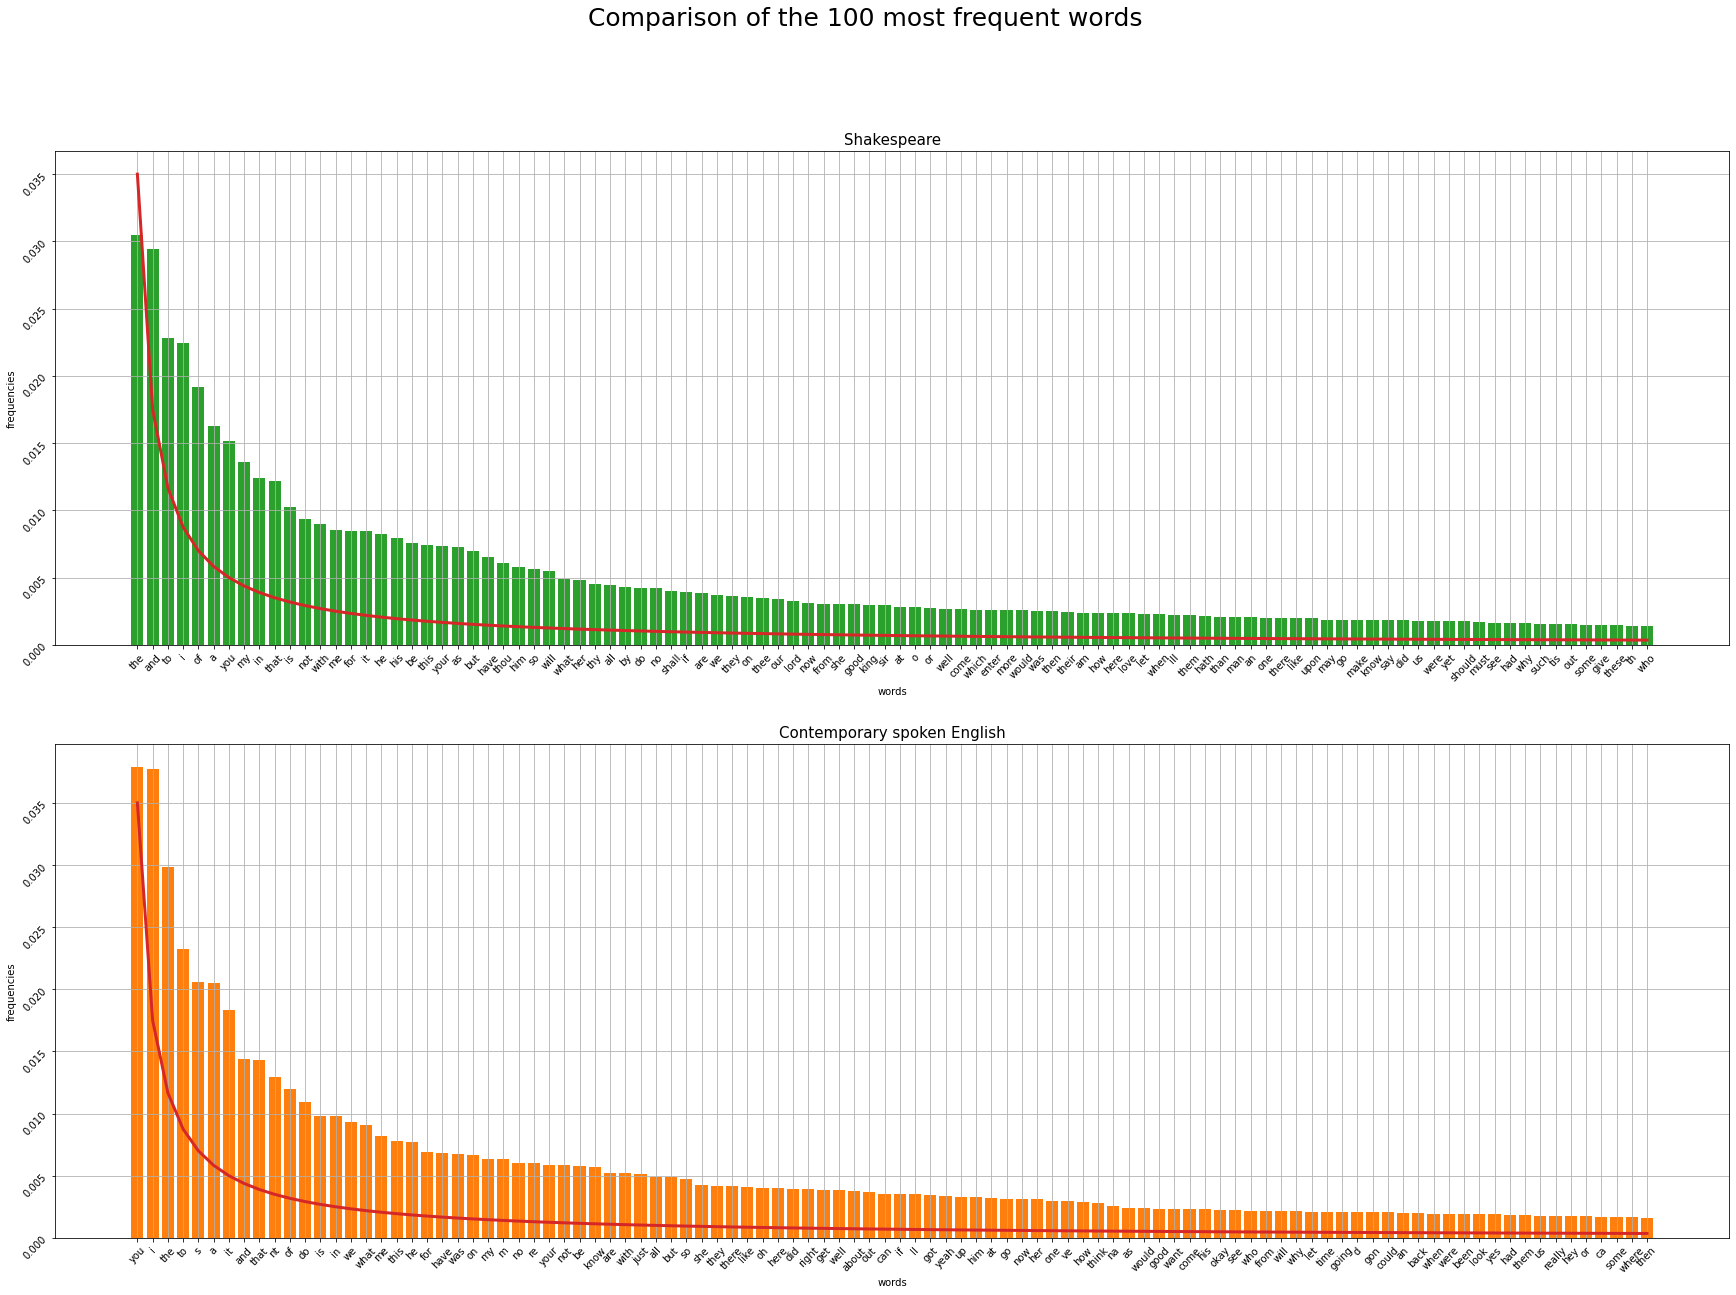

In [77]:
words_shakespeare, frequencies_shakespeare = final_top100(sorted_counts_shakespeare)
words_tv, frequencies_tv = final_top100(sorted_counts_tv)

ranks = range(1,101)
zipf = [0.035/rank for rank in ranks]

figure, ax = plt.subplots(2, 1, figsize=(30,20))
figure.suptitle("Comparison of the 100 most frequent words", fontsize=25)

ax[0].bar(words_shakespeare, frequencies_shakespeare, color="tab:green")
ax[0].plot(words_shakespeare, zipf, c="tab:red", linewidth=3)
ax[0].set_xlabel("words")
ax[0].set_ylabel("frequencies")
ax[0].set_title("Shakespeare", size=15)
ax[0].grid()
ax[0].tick_params(labelrotation=46)

ax[1].bar(words_tv, frequencies_tv, color="tab:orange")
ax[1].plot(words_tv, zipf, c="tab:red", linewidth=3)
ax[1].set_xlabel("words")
ax[1].set_ylabel("frequencies")
ax[1].set_title("Contemporary spoken English", size=15)
ax[1].grid()
ax[1].tick_params(labelrotation=46)


plt.show()